In [4]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [5]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [6]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

import pandas as pd

In [7]:
def get_jobs_in_range(dfq,start,end):
    df1=dfq.query('submit >= @start and submit < @end')
    return df1

In [8]:
# weekly prediction for the month of March
df_arr={}
df_feb_aug = create_input_data.read_data(csv_file_name="../data/processed/lookback35_anon_feb1_aug1.csv", parse_dates_col=[4,5,6])


#df_arr['1wee']= get_jobs_in_range(df_feb_aug,"2022-03-01","2022-03-07")
#df_arr['april']= get_jobs_in_range(df_feb_aug,"2022-04-01","2022-05-01")


In [9]:
## weeks for March
weeks=[]
day1 = pd.Timestamp("2022-03-01")
weeks.append(day1)
#day8 = day1_mar + pd.Timedelta("7 days")
next_week = day1
for i in range(0,5):
    next_week=next_week + pd.Timedelta("7 days")
    weeks.append(next_week)
for i in range(0,6):
    print(str(weeks[i]) + ": " + str(weeks[i].day_name()))

2022-03-01 00:00:00: Tuesday
2022-03-08 00:00:00: Tuesday
2022-03-15 00:00:00: Tuesday
2022-03-22 00:00:00: Tuesday
2022-03-29 00:00:00: Tuesday
2022-04-05 00:00:00: Tuesday


In [10]:
for i in range(0,5):
    df_arr['week'+ str(i+1)]= get_jobs_in_range(df_feb_aug,weeks[i], weeks[i+1])

In [11]:
week_names=[]
for i in range(0,5):
    week_names.append('week'+str(i+1))
print(week_names)    

['week1', 'week2', 'week3', 'week4', 'week5']


In [27]:
df_arr['week4']

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
66213,9330530,7b3034aaa7191b474402edabfcb09b0bb3ce537f891da7...,c52ee554ca635b1e6ba534cdd5b178297dabd8904a9af2...,COMPLETED,2022-03-22 00:02:06,2022-03-22 05:50:29,2022-03-22 07:02:52,360,120,120,...,3,2,2,2,2,2,2,2,2,2
66214,9330542,4ea978c84ba149485e87b2cc0e9b61e74be35cf5c1877b...,d402842d88569120f17d94ffc2ef080dcad71b79d8518f...,COMPLETED,2022-03-22 00:08:16,2022-03-22 04:47:16,2022-03-22 10:21:15,1,1,480,...,3,2,2,2,2,2,2,2,2,2
66215,9330544,87cd548ca597684e0c10ef16ebff091f03815e73973f78...,379c458040571502e6654cf29eb59b188100cff9862076...,COMPLETED,2022-03-22 00:09:12,2022-03-22 00:09:36,2022-03-22 00:16:52,1,1,60,...,3,2,2,2,2,2,2,2,2,2
66216,9330546,85d2c0fb3bd41d321293160dc1073d4c5d72d0a47a3293...,798067677b078fed29ca0c3438ce3a528ffcff50ea8e08...,COMPLETED,2022-03-22 00:10:19,2022-03-22 00:10:44,2022-03-22 00:11:20,32,1,30,...,3,3,2,2,2,2,2,2,2,2
66217,9330547,85d2c0fb3bd41d321293160dc1073d4c5d72d0a47a3293...,798067677b078fed29ca0c3438ce3a528ffcff50ea8e08...,COMPLETED,2022-03-22 00:10:20,2022-03-22 00:10:44,2022-03-22 00:11:20,32,1,30,...,3,3,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75959,9364809,6c5f8ed16c916e5c9e19f6a090cd64fb84b3669332c1e9...,379c458040571502e6654cf29eb59b188100cff9862076...,COMPLETED,2022-03-28 23:55:19,2022-03-28 23:55:34,2022-03-29 00:17:31,1,1,60,...,4,4,4,4,4,4,4,4,4,2
75960,9364815,a920b593f0d515f0486e0b7ddc9120468160f65c78fcda...,e70b7400b5daa02aa60e724a2e9e33283646a3cefb9fb7...,COMPLETED,2022-03-28 23:56:29,2022-03-29 04:30:27,2022-03-29 15:07:28,204,3,1440,...,4,4,4,4,4,4,4,4,4,4
75961,9364830,a920b593f0d515f0486e0b7ddc9120468160f65c78fcda...,e70b7400b5daa02aa60e724a2e9e33283646a3cefb9fb7...,COMPLETED,2022-03-28 23:57:24,2022-03-29 04:30:27,2022-03-29 15:21:42,204,3,1440,...,4,4,4,4,4,4,4,4,4,4
75962,9364835,5fea0bd80bf550bd485010501f88c6298842b02ad4f8ff...,d53375f2fe679fec9c02abe40e1dbbb443eb74bffb428e...,COMPLETED,2022-03-28 23:58:04,2022-03-29 00:09:39,2022-03-29 00:23:47,2304,48,50,...,4,4,4,4,4,4,4,4,4,4


In [13]:
def train_test_data(month):
    X_historydata = df_arr[month]
    ## remove default columns
    df = build_features.remove_default_cols(df_arr[month])
    Y_waittimedata = df['queue_minutes']
    X_historydata= build_features.remove_cols(df,['queue_minutes','run_minutes'])
    return X_historydata, Y_waittimedata

In [14]:
from sklearn.linear_model import LinearRegression
def train_model_LR(X_historydata_norm, Y_waittimedata_train):
    lreg = LinearRegression().fit(X_historydata_norm, Y_waittimedata_train)
    model_score = lreg.score(X_historydata_norm, Y_waittimedata_train)
    return lreg, model_score

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def predict_evaluate(lreg,scaler,X_historydata_test,Y_waittimedata_test):
    y_pred=lreg.predict(scaler.transform(X_historydata_test))
    y_pred = np.where(y_pred<0,0,y_pred)
    r2s = r2_score(Y_waittimedata_test.to_numpy(),y_pred)
    mse = mean_squared_error(Y_waittimedata_test.to_numpy(),y_pred,squared=False)
    mae = mean_absolute_error(Y_waittimedata_test.to_numpy(),y_pred)
    return y_pred, r2s, mse, mae

In [16]:
from importlib import reload
reload(analyze_pred)
reload(build_features)


<module 'features.build_features' from '/home/jovyan/work/src/features/build_features.py'>

In [29]:
from importlib import reload
import numpy as np
reload(analyze_pred)
reload(build_features)
train_week=['week1', 'week2', 'week3', 'week4']
predict_week=['week2', 'week3', 'week4', 'week5']
results=[]
for i in range(0,4):
    result = {}
    result['train_week']= train_week[i]
    result['predict_week']= predict_week[i]
    X_historydata_train, Y_waittimedata_train = train_test_data(train_week[i])
    X_historydata_test, Y_waittimedata_test = train_test_data(predict_week[i])
    X_historydata_norm, scaler = build_features.standardization(X_historydata_train)
    lreg, model_score = train_model_LR(X_historydata_norm, Y_waittimedata_train)
    y_pred, r2s, mse, mae = predict_evaluate(lreg,scaler,X_historydata_test,Y_waittimedata_test)
    provision_time = 20
    tolerance_factor = 3
    provision_time, n_scheduled, n_missed, no_missed, wrongly_scheduled, t_num = analyze_pred.analysis_short(0,Y_waittimedata_test.shape[0], Y_waittimedata_test, y_pred.ravel(),
                                                                                                          provision_time=provision_time, tolerance_factor=tolerance_factor)
    
    result['ideally_sched'] = n_scheduled
    result['missed'] = n_missed

    result['wrongly_sched'] = wrongly_scheduled
    result['total_num'] = t_num
    result['%_wrongly_sched'] = (wrongly_scheduled/t_num)*100
    result['%_ideally_sched'] = (n_scheduled/t_num)*100
    result['%_missed_oppor.'] = (n_missed/n_scheduled)*100
    result['t_wrong_sched_%'] = (wrongly_scheduled/(wrongly_scheduled + no_missed))*100
    result['r2s'] = r2s
    result['mse'] = mse
    result['mae'] = mae
    result['model_score'] = model_score
    #result['model'] = lreg
    result['y_pred'] = y_pred
    #result['not_missed'] = no_missed
    #result['provision_time'] = provision_time
    results.append(result)
    #print(result)
    #print("\n")


In [30]:
reload(analyze_pred)
rdf = analyze_pred.add_all_to_df(results)

In [31]:
rdf

,train_week,predict_week,ideally_sched,missed,wrongly_sched,total_num,%_wrongly_sched,%_ideally_sched,%_missed_oppor.,t_wrong_sched_%,r2s,mse,mae,model_score,y_pred
0,week1,week2,5037,4111,408,14087,2.896287,35.756371,81.616041,30.584708,-0.105780,333.632445,112.854581,0.305524,"[942.3339687610461, 195.85962296056238, 700.40..."
1,week2,week3,3789,28,3645,7604,47.935297,49.829037,0.738981,49.216851,0.029864,867.566439,301.748017,0.185295,"[485.92868447602893, 108.94760144259207, 183.0..."
2,week3,week4,4715,1346,1682,9751,17.249513,48.354015,28.547190,33.300337,-0.298367,317.953480,175.289837,0.149159,"[161.97321134544325, 240.40826682615142, 158.8..."
3,week4,week5,3070,524,5222,11447,45.618939,26.819254,17.068404,67.224511,-13.870914,650.148865,418.147374,0.261210,"[345.0437950479457, 84.42401803810534, 345.929..."


In [32]:
# write to file
from pathlib import Path  
filepath = Path('../data/processed/weekly_prediction_lookback35_LR_anon_march22.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
rdf.to_csv(filepath,index=False)

Text(0, 0.5, 'Total Number of Wrong Scheduled Jobs')

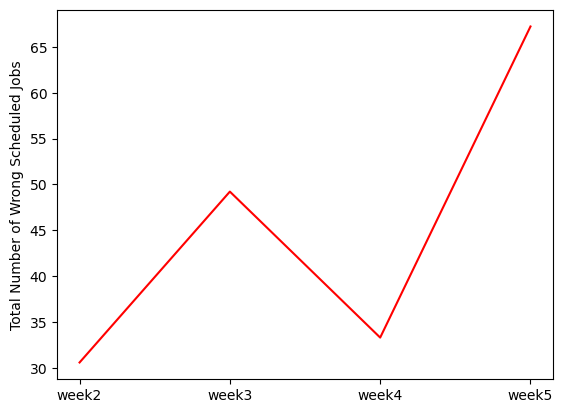

In [26]:
t_wrong_sched= [] 


for i in range(0,4):
    t_wrong_sched.append(results[i]['t_wrong_sched_%'])
plt.plot(predict_week,t_wrong_sched,'r')
plt.ylabel('Total Number of Wrong Scheduled Jobs')

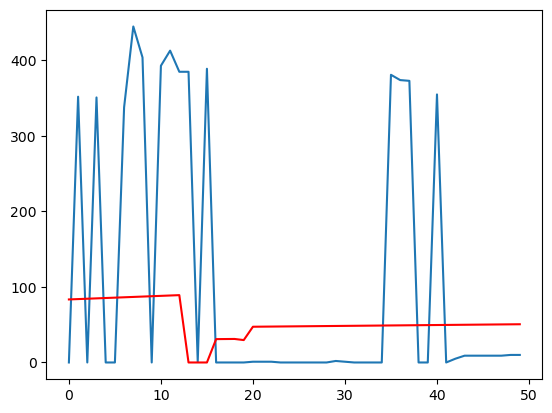

In [24]:
import matplotlib.pyplot as plt
plt.plot(df_arr['week1']['queue_minutes'].to_numpy()[150:200])
plt.plot(results[0]['y_pred'][150:200],'r')

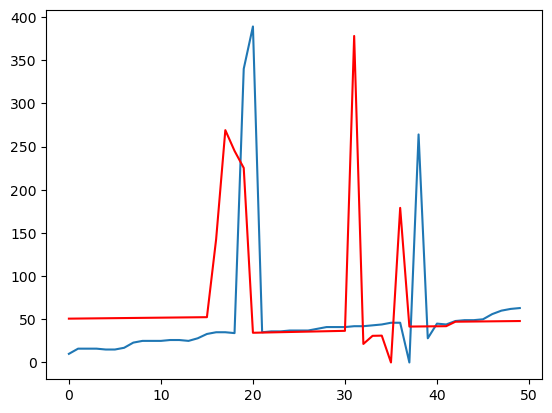

In [53]:
plt.plot(df_arr['week1']['queue_minutes'].to_numpy()[200:250])
plt.plot(results[0]['y_pred'][200:250],'r')

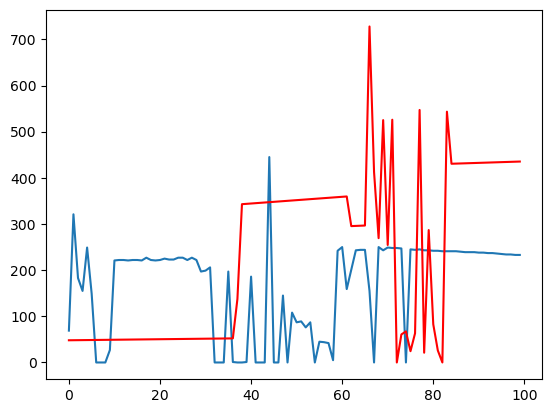

In [54]:
plt.plot(df_arr['week1']['queue_minutes'].to_numpy()[250:350])
plt.plot(results[0]['y_pred'][250:350],'r')

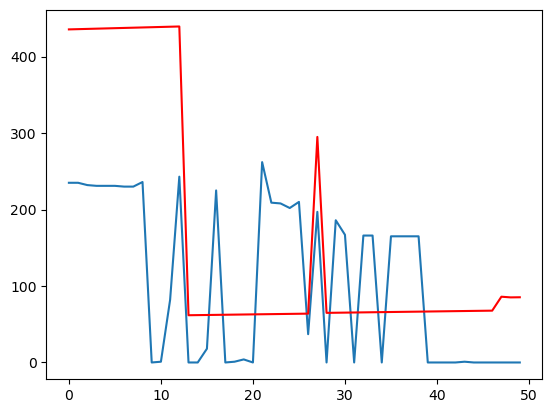

In [55]:
plt.plot(df_arr['week1']['queue_minutes'].to_numpy()[350:400])
plt.plot(results[0]['y_pred'][350:400],'r')

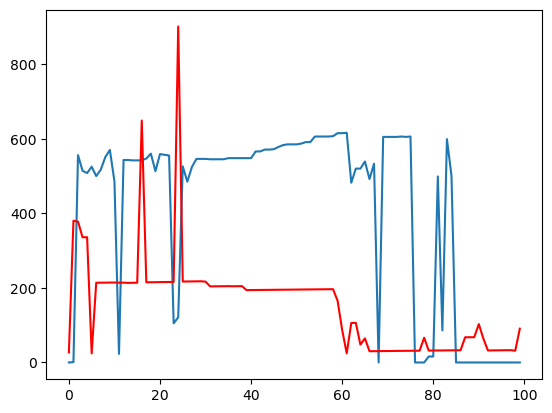

In [56]:
plt.plot(df_arr['week1']['queue_minutes'].to_numpy()[1250:1350])
plt.plot(results[0]['y_pred'][1250:1350],'r')